In [1]:
import tldextract
import re
import numpy as np

def domain_extract(domain):
    try:
        ext = tldextract.extract(domain)
        if (not ext.suffix):
            return np.nan
        elif re.match('^[1-9a-zA-Z-]{1,63}$', ext.domain):
            return ext.domain
        else:
            return np.nan
    except:
        print domain
        return np.nan

In [2]:
import pandas as pd
pd.__version__

u'0.19.2'

In [3]:
dga_dataframe = pd.read_csv('dga.csv', names=['family', 'domain', 'stime', 'etime'], header=None, encoding='utf-8')
dga_dataframe.head()

,family,domain,stime,etime
0,nymaim,qoxkpqlqm.biz,2017-05-01 00:00:00,2017-05-01 23:59:59
1,nymaim,xjvlja.org,2017-05-01 00:00:00,2017-05-01 23:59:59
2,nymaim,tdksfgspy.biz,2017-05-01 00:00:00,2017-05-01 23:59:59
3,nymaim,udbwmukdw.com,2017-05-01 00:00:00,2017-05-01 23:59:59
4,nymaim,wrphopu.biz,2017-05-01 00:00:00,2017-05-01 23:59:59


In [4]:
dga_dataframe['domain'] = [domain_extract(uri) for uri in dga_dataframe['domain']]
dga_dataframe.tail()

,family,domain,stime,etime
1037300,ramnit,gkptqpxwcssikkqrl,1970-01-01 00:00:00,2030-01-01 00:00:00
1037301,ramnit,syluctetweb,1970-01-01 00:00:00,2030-01-01 00:00:00
1037302,ramnit,pfvwbswbcmdl,1970-01-01 00:00:00,2030-01-01 00:00:00
1037303,ramnit,xcsxtiote,1970-01-01 00:00:00,2030-01-01 00:00:00
1037304,ramnit,qewhysmasnnxpfn,1970-01-01 00:00:00,2030-01-01 00:00:00


In [5]:
#del dga_dataframe['family']
del dga_dataframe['stime']
del dga_dataframe['etime']
dga_dataframe['class'] = 'dga'
dga_dataframe.head()

,family,domain,class
0,nymaim,qoxkpqlqm,dga
1,nymaim,xjvlja,dga
2,nymaim,tdksfgspy,dga
3,nymaim,udbwmukdw,dga
4,nymaim,wrphopu,dga


In [6]:
#dga_dataframe.rename(columns={'family': 'class'}, inplace = True)
dga_dataframe = dga_dataframe.dropna().drop_duplicates()

In [7]:
import re
#if re.match('xn--', '2xn---'):
#    print 1
#dga_dataframe[re.match('xn--', dga_dataframe['domain'])]
#dga_dataframe['family'] == 'nymaim'
#dga_dataframe[pd.Series([re.match('qo', i)!= None for i in dga_dataframe['domain']])]
#pd.Series([re.match('qo', i)!= None for i in dga_dataframe['domain']])
x = dga_dataframe[dga_dataframe['family'] == 'nymaim']

In [8]:
x.count()

family    248
domain    248
class     248
dtype: int64

In [9]:
#x[pd.Series([re.match('qo', i)!= None for i in x['domain']])]
x['domain'].is_unique

True

In [11]:
alexa_dataframe = pd.read_csv('top-1m.csv', names = ['n', 'domain'], header=None, encoding='utf-8')
alexa_dataframe['class'] = 'legit'
alexa_dataframe['family'] = 'legit'
del alexa_dataframe['n']
alexa_dataframe['domain'] = [domain_extract(uri) for uri in alexa_dataframe['domain']]
alexa_dataframe = alexa_dataframe.dropna().drop_duplicates()
alexa_dataframe.head()

xn--dk8h6i.ws


,domain,class,family
0,google,legit,legit
1,youtube,legit,legit
2,facebook,legit,legit
3,baidu,legit,legit
4,wikipedia,legit,legit


In [12]:
all_domains = pd.concat([alexa_dataframe, dga_dataframe], ignore_index=True)
all_domains.count()

class     1832297
domain    1832297
family    1832297
dtype: int64

In [13]:
all_domains['length'] = [len(x) for x in all_domains['domain']]
#all_domains = all_domains[all_domains['length'] > 6]

In [14]:
all_domains.head()

,class,domain,family,length
0,legit,google,legit,6
1,legit,youtube,legit,7
2,legit,facebook,legit,8
3,legit,baidu,legit,5
4,legit,wikipedia,legit,9


In [15]:
import math
from collections import Counter
 
def entropy(s):
    p, lns = Counter(s), float(len(s))
    return -sum( count/lns * math.log(count/lns, 2) for count in p.values())
all_domains['entropy'] = [entropy(x) for x in all_domains['domain']]
all_domains.head()

,class,domain,family,length,entropy
0,legit,google,legit,6,1.918296
1,legit,youtube,legit,7,2.521641
2,legit,facebook,legit,8,2.750000
3,legit,baidu,legit,5,2.321928
4,legit,wikipedia,legit,9,2.641604


In [16]:
all_domains.tail()

,class,domain,family,length,entropy
1832292,dga,gkptqpxwcssikkqrl,ramnit,17,3.454822
1832293,dga,syluctetweb,ramnit,11,3.095795
1832294,dga,pfvwbswbcmdl,ramnit,12,3.251629
1832295,dga,xcsxtiote,ramnit,9,2.725481
1832296,dga,qewhysmasnnxpfn,ramnit,15,3.456565


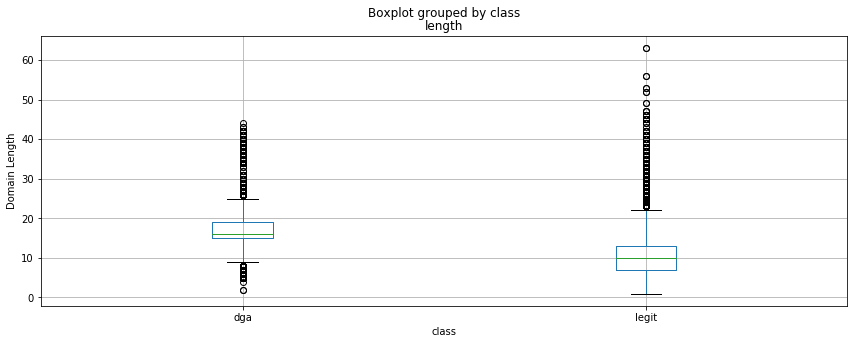

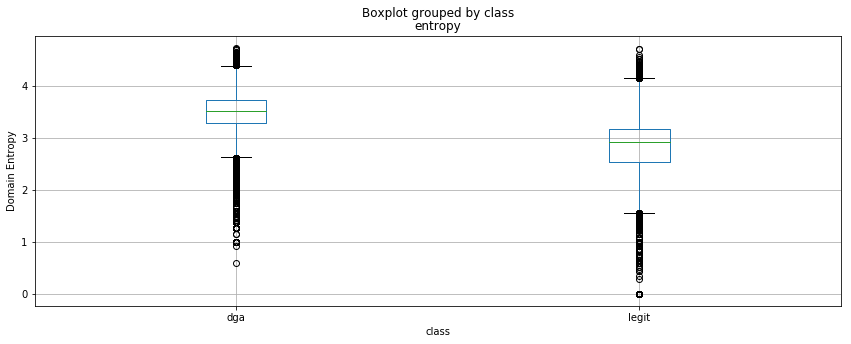

In [17]:
# Set default pylab stuff
import pylab
pylab.rcParams['figure.figsize'] = (14.0, 5.0)
pylab.rcParams['axes.grid'] = True

all_domains.boxplot('length','class')
pylab.ylabel('Domain Length')
all_domains.boxplot('entropy','class')
pylab.ylabel('Domain Entropy')
pylab.show()

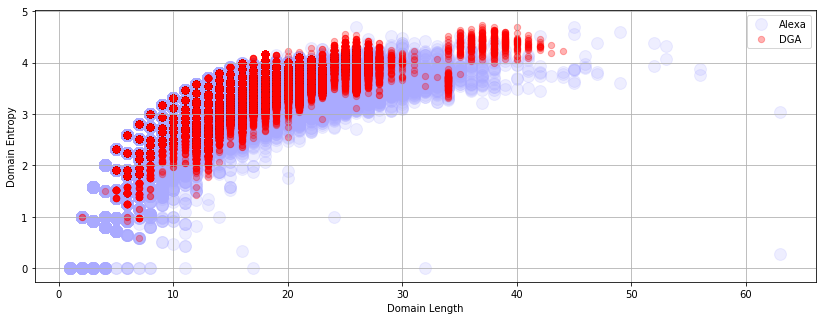

In [18]:
import matplotlib.pyplot as plt
cond = all_domains['class'] == 'dga'
dga = all_domains[cond]
alexa = all_domains[~cond]
plt.scatter(alexa['length'], alexa['entropy'], s=140, c='#aaaaff', label='Alexa', alpha=.2)
plt.scatter(dga['length'], dga['entropy'], s=40, c='r', label='DGA', alpha=.3)
plt.legend()
pylab.xlabel('Domain Length')
pylab.ylabel('Domain Entropy')
plt.show()

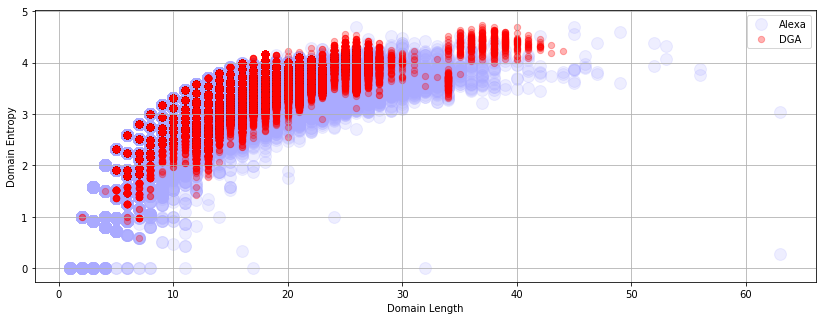

In [19]:
import matplotlib.pyplot as plt
cond = all_domains['class'] == 'dga'
dga = all_domains[cond]
alexa = all_domains[~cond]
plt.scatter(alexa['length'], alexa['entropy'], s=140, c='#aaaaff', label='Alexa', alpha=.2)
plt.scatter(dga['length'], dga['entropy'], s=40, c='r', label='DGA', alpha=.3)
plt.legend()
pylab.xlabel('Domain Length')
pylab.ylabel('Domain Entropy')
plt.show()

In [20]:
high_entropy_domains = all_domains[all_domains['entropy'] > 4]
print 'Num Domains above 4 entropy: %.2f%% %d (out of %d)' % \
            (100.0*high_entropy_domains.shape[0]/all_domains.shape[0],high_entropy_domains.shape[0],all_domains.shape[0])
print "Num high entropy legit: %d" % high_entropy_domains[high_entropy_domains['class']=='legit'].shape[0]
print "Num high entropy DGA: %d" % high_entropy_domains[high_entropy_domains['class']=='dga'].shape[0]
high_entropy_domains[high_entropy_domains['class']=='legit'].head()

Num Domains above 4 entropy: 0.84% 15312 (out of 1832297)
Num high entropy legit: 318
Num high entropy DGA: 14994


,class,domain,family,length,entropy
19890,legit,stream-a-ams1xx2sfcdnvideo5269,legit,30,4.189898
21089,legit,xn--cckea5a6cidcbh6ce7ghug17a2ge3aht3nwigef516...,legit,53,4.327188
41838,legit,xn--o9j592picar41ae8dgva,legit,24,4.220176
46378,legit,xn--eckybzahmsm43ab5g5336c9iug,legit,30,4.281728
49020,legit,xn--gck7ah6dsb1hyhl922bco4a,legit,27,4.208410


In [21]:
high_entropy_domains.groupby(['family']).count()

,class,domain,length,entropy
family,,,,
banjori,4001,4001,4001,4001
dircrypt,1,1,1,1
gameover,3607,3607,3607,3607
legit,318,318,318,318
murofet,441,441,441,441
necurs,63,63,63,63
ramnit,24,24,24,24
ranbyus,3,3,3,3
rovnix,6854,6854,6854,6854


In [22]:
all_domains.groupby(['family']).count()

,class,domain,length,entropy
family,,,,
bamital,4,4,4,4
banjori,439093,439093,439093,439093
blackhole,2,2,2,2
chinad,673,673,673,673
conficker,496,496,496,496
cryptolocker,1000,1000,1000,1000
dircrypt,350,350,350,350
dyre,116,116,116,116
emotet,176064,176064,176064,176064


In [23]:
high_entropy_domains[(high_entropy_domains['class']=='legit') & (high_entropy_domains['domain'].str.startswith('xn--'))].count()
#high_entropy_domains[high_entropy_domains['domain'].str.startswith('xn--')].count()
#high_entropy_domains['domain'].str.startswith('xn--')

class      206
domain     206
family     206
length     206
entropy    206
dtype: int64

In [24]:
X = all_domains.as_matrix(['length', 'entropy'])
print len(X)

1832297


In [25]:
y = np.array(all_domains['class'].tolist())
print len(y)

1832297


In [26]:
import sklearn.ensemble
clf = sklearn.ensemble.RandomForestClassifier(n_estimators=50)

In [27]:
scores = sklearn.model_selection.cross_val_score(clf, X, y, cv=10, n_jobs=-1)
print scores

[ 0.80091797  0.89526278  0.60726955  0.77678328  0.8774764   0.68811876
  0.78324938  0.758619    0.61731494  0.67673785]


In [28]:
sklearn.__version__

'0.18.1'

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Confusion Matrix Stats
legit/legit: 81.65% (70434/86261)
legit/dga: 18.35% (15827/86261)
dga/legit: 17.00% (16481/96969)
dga/dga: 83.00% (80488/96969)


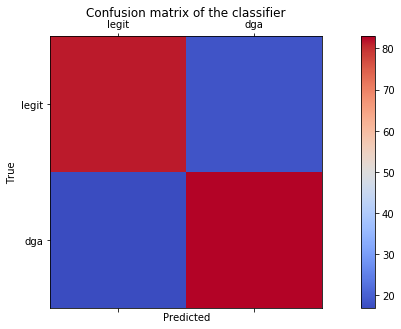

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels = ['legit', 'dga'])
labels = ['legit', 'dga']
def plot_cm(cm, labels):
    
    # Compute percentanges
    percent = (cm*100.0)/np.array(np.matrix(cm.sum(axis=1)).T)  # Derp, I'm sure there's a better way
    
    print 'Confusion Matrix Stats'
    for i, label_i in enumerate(labels):
        for j, label_j in enumerate(labels):
            print "%s/%s: %.2f%% (%d/%d)" % (label_i, label_j, (percent[i][j]), cm[i][j], cm[i].sum())

    # Show confusion matrix
    # Thanks kermit666 from stackoverflow :)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.grid(b=False)
    cax = ax.matshow(percent, cmap='coolwarm')
    pylab.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    pylab.xlabel('Predicted')
    pylab.ylabel('True')
    pylab.show()

plot_cm(cm, labels)

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
alexa_vc = CountVectorizer(analyzer='char', ngram_range=(3,5), min_df=1e-6, max_df=1.0, vocabulary=None)

In [32]:
counts_matrix = alexa_vc.fit_transform(alexa_dataframe['domain'])
alexa_counts = np.log10(counts_matrix.sum(axis=0).getA1())
ngrams_list = alexa_vc.get_feature_names()

In [33]:
import operator
_sorted_ngrams = sorted(zip(ngrams_list, alexa_counts), key=operator.itemgetter(1), reverse=True)
print 'Alexa NGrams: %d' % len(_sorted_ngrams)
for ngram, count in _sorted_ngrams[:10]:
    print ngram, count

Alexa NGrams: 1334771
ing 4.45939248776
ine 4.35487642252
ion 4.32114256523
ent 4.31124512088
ter 4.30178934677
lin 4.29891854301
the 4.22975861122
and 4.2280151751
est 4.20207944101
tor 4.20085049809


In [34]:
from sklearn.feature_extraction.text import CountVectorizer
alexa_vc = CountVectorizer(analyzer='char', ngram_range=(1), min_df=1e-6, max_df=1.0, vocabulary=None)

In [58]:
word_dataframe = pd.read_csv('Data/words.csv', names=['word'], header=None, dtype={'word': np.str}, encoding='utf-8')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)